In [45]:
import os

In [46]:
%pwd

'd:\\Chest-Cancer-Classification'

In [47]:
os.chdir("../")

In [48]:
%pwd

'd:\\'

In [49]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [50]:
# Function to load images and labels
def load_images_and_labels(base_dir, class_names):
    images = []
    labels = []

    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(base_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (128, 128))  # Resize images
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

In [51]:
# Function to extract features from an image
def extract_features(images):
    feature_list = []

    for img in images:
        
        fd, _ = hog(img, orientations=8, pixels_per_cell=(16, 16), 
                    cells_per_block=(1, 1), visualize=True)
        feature_list.append(fd)

    return np.array(feature_list)

In [52]:
# Define your class names
class_names = ['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']  # Replace with your class names

In [53]:
# Load images and labels
train_images, train_labels = load_images_and_labels('artifacts/data_ingestion/train', class_names)
test_images, test_labels = load_images_and_labels('artifacts/data_ingestion/valid', class_names)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'artifacts/data_ingestion/train\\adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'

In [ ]:
# Extract features
train_features = extract_features(train_images)
test_features = extract_features(test_images)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

d:\Chest-Cancer-Classification\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics:
Accuracy: 0.8472222222222222
Precision: 0.8551113360323886
Recall: 0.8573737856346552
F1 Score: 0.8502814258911819


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.78      0.86        23
           1       0.90      0.86      0.88        21
           2       0.92      0.92      0.92        13
           3       0.65      0.87      0.74        15

    accuracy                           0.85        72
   macro avg       0.86      0.86      0.85        72
weighted avg       0.87      0.85      0.85        72

SVM Metrics:
Accuracy: 0.875
Precision: 0.8909090909090909
Recall: 0.8922360248447205
F1 Score: 0.8847953216374269


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84        23
           1       1.00      0.81      0.89        21
           2       1.00      1.00      1.00        13
           3       0.70      0.93    

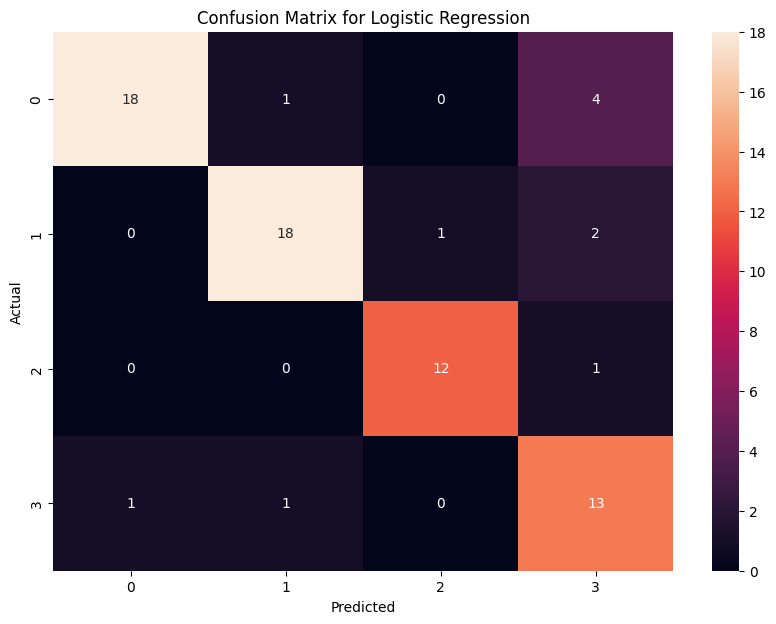

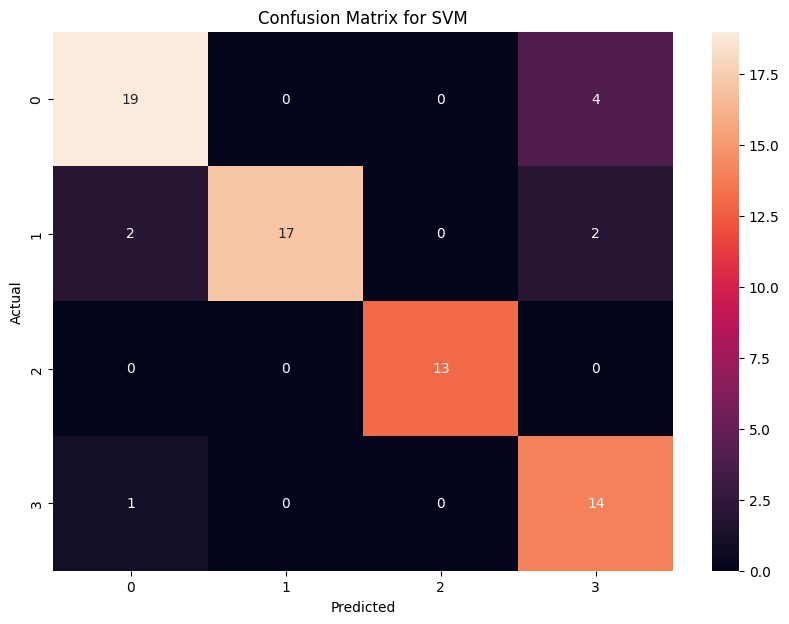

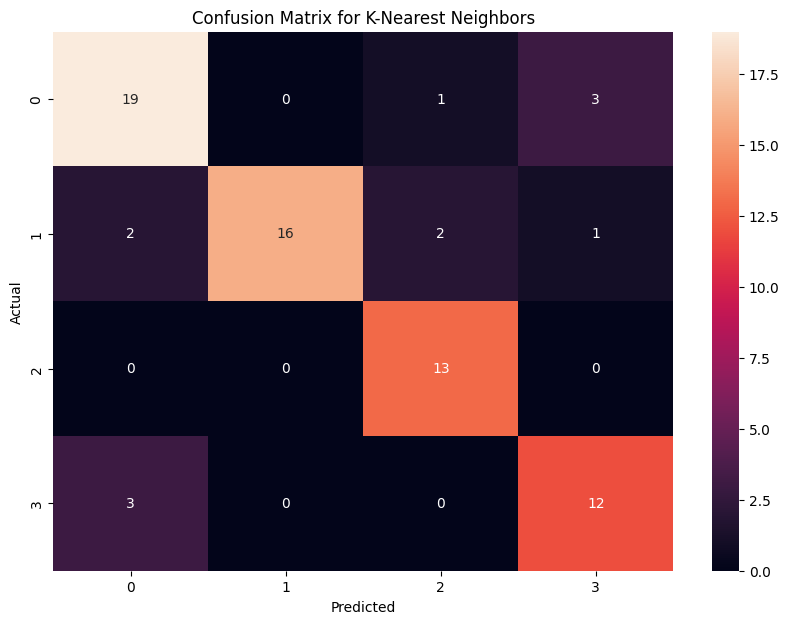

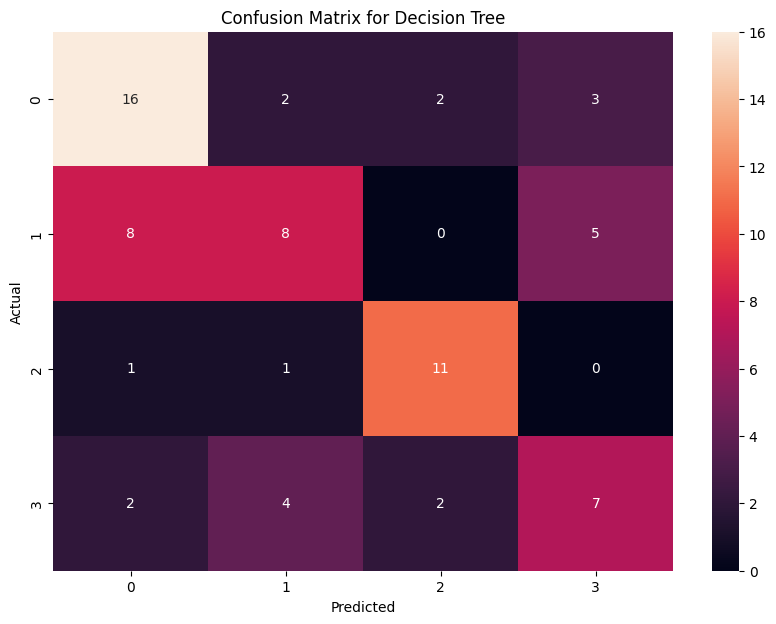

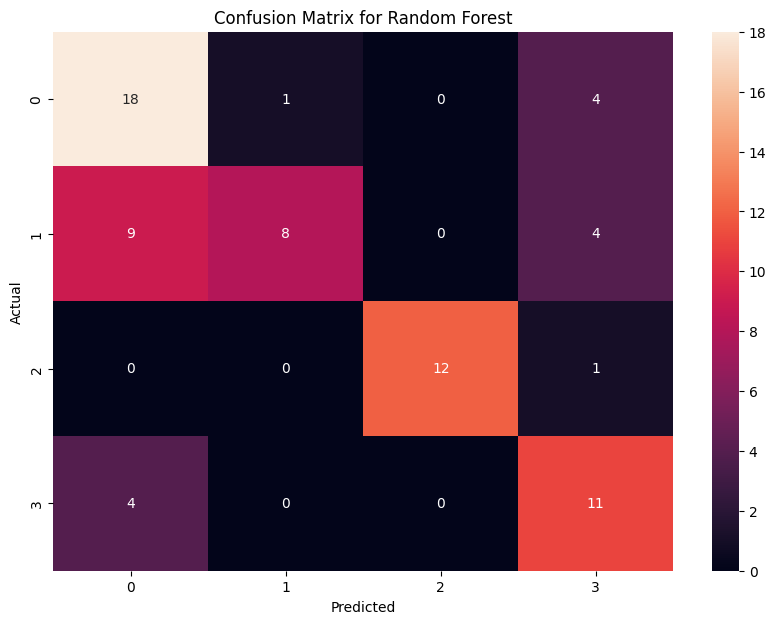

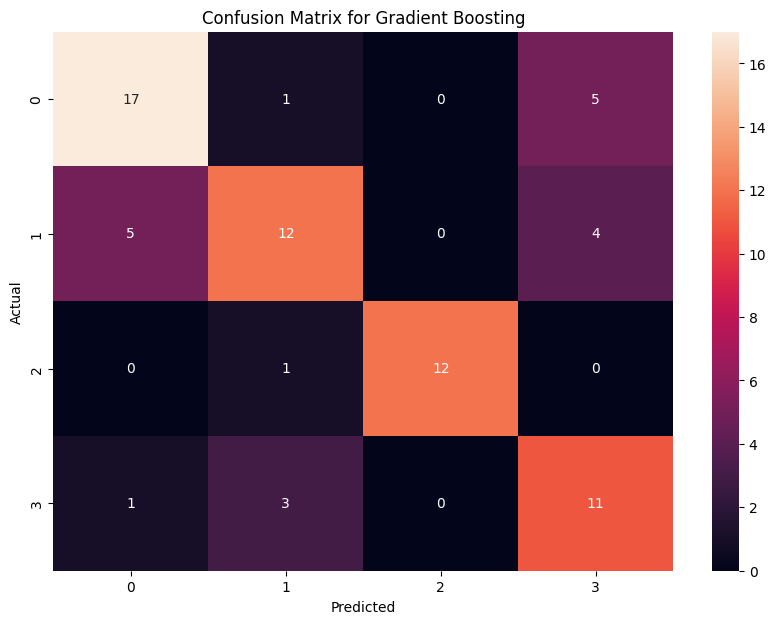

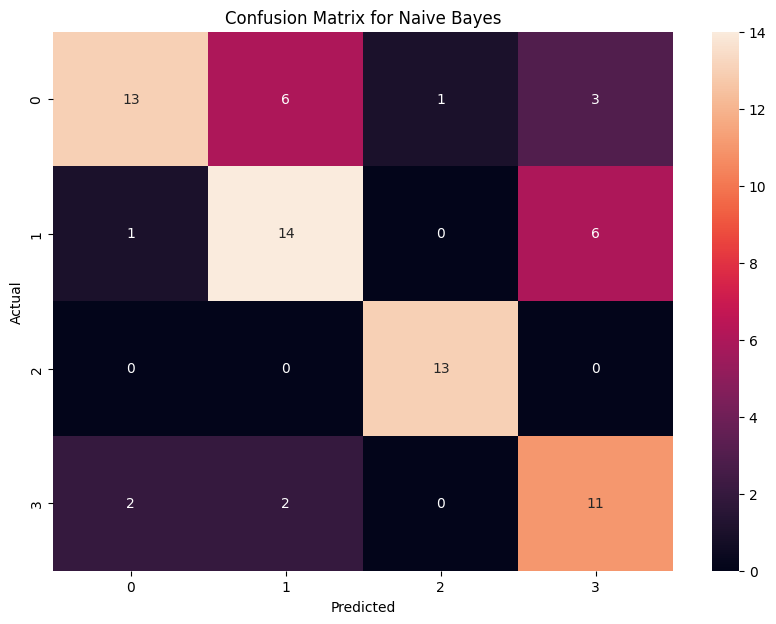

In [ ]:
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('SVM', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Naive Bayes', GaussianNB())
]

def append_to_csv(clf_name, accuracy, precision, recall, f1_score):
    results_file = os.path.join("results", 'results.csv')
    new_row = {'Model': clf_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score}

    if not os.path.isfile(results_file):
        pd.DataFrame([new_row]).to_csv(results_file, index=False)
    else:
        pd.DataFrame([new_row]).to_csv(results_file, mode='a', header=False, index=False)

# Train and evaluate each classifier
for clf_name, clf in classifiers:
    clf.fit(train_features, train_labels)
    y_pred = clf.predict(test_features)
    
    
    # Compute metrics
    accuracy = accuracy_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred, average='macro')
    recall = recall_score(test_labels, y_pred, average='macro')
    f1 = f1_score(test_labels, y_pred, average='macro')

    # Print metrics
    print(f"{clf_name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")
    
    # Confusion Matrix
    cm = confusion_matrix(test_labels, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    # Save Confusion Matrix
    plt.savefig(f'results/confusion_matrix_{clf_name}.png')
    
    print("\nClassification Report:\n", classification_report(test_labels, y_pred))
    
    append_to_csv(clf_name, accuracy, precision, recall, f1)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define classifiers and hyperparameter grids
classifiers = {
    'Logistic Regression': (LogisticRegression(), 
                            {'C': [0.1, 1, 10, 100], 'solver': ['liblinear']}),
    'SVM': (SVC(), 
            {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'K-Nearest Neighbors': (KNeighborsClassifier(), 
                            {'n_neighbors': [3, 5, 11], 'weights': ['uniform', 'distance']}),
    'Decision Tree': (DecisionTreeClassifier(), 
                      {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}),
    'Random Forest': (RandomForestClassifier(), 
                      {'n_estimators': [50, 100, 200], 'max_features': ['auto', 'sqrt', 'log2']}),
    'Gradient Boosting': (GradientBoostingClassifier(), 
                          {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}),
    'Naive Bayes': (GaussianNB(), {})
}

def perform_grid_search(clf, params, X_train, y_train):
    grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

def append_to_csv_ht(clf_name, accuracy, precision, recall, f1_score):
    results_file = os.path.join("results", 'results.csv')
    clf_name = clf_name + "_Hyperparam_tuning"
    new_row = {'Model': clf_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score}

    if not os.path.isfile(results_file):
        pd.DataFrame([new_row]).to_csv(results_file, index=False)
    else:
        pd.DataFrame([new_row]).to_csv(results_file, mode='a', header=False, index=False)

# Create a directory for results if it doesn't exist
os.makedirs("results", exist_ok=True)

# Perform hyperparameter tuning and evaluation for each classifier
for clf_name, (clf, params) in classifiers.items():
    print(f"Processing {clf_name}...")
    best_clf = perform_grid_search(clf, params, train_features, train_labels)
    y_pred = best_clf.predict(test_features)

    # Compute and print metrics
    accuracy = accuracy_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred, average='macro')
    recall = recall_score(test_labels, y_pred, average='macro')
    f1 = f1_score(test_labels, y_pred, average='macro')
    
    print(f"{clf_name} Metrics (After Hyperparameter tuning):")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")
    
    # print(f"{clf_name}_Hyperparameter_tuning Metrics: Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}\n")
    
    # Confusion Matrix and save it
    cm = confusion_matrix(test_labels, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.savefig(f'results/confusion_matrix_{clf_name}_Hyperparameter_tuning.png')
    plt.close()
    
    append_to_csv_ht(clf_name, accuracy, precision, recall, f1)

print("All models processed. Results saved to 'results/results.csv'.")

Processing Logistic Regression...
Logistic Regression Metrics (After Hyperparameter tuning):
Accuracy: 0.8472222222222222
Precision: 0.8579622132253711
Recall: 0.86213569039656
F1 Score: 0.8519993894993896

Processing SVM...
SVM Metrics (After Hyperparameter tuning):
Accuracy: 0.9166666666666666
Precision: 0.9223057644110275
Recall: 0.9316770186335404
F1 Score: 0.9228609625668449

Processing K-Nearest Neighbors...
K-Nearest Neighbors Metrics (After Hyperparameter tuning):
Accuracy: 0.8333333333333334
Precision: 0.8472714237516868
Recall: 0.8491957318044274
F1 Score: 0.841481945987578

Processing Decision Tree...
Decision Tree Metrics (After Hyperparameter tuning):
Accuracy: 0.5138888888888888
Precision: 0.5280257936507936
Recall: 0.5419732441471572
F1 Score: 0.5320184788269895

Processing Random Forest...


d:\Chest-Cancer-Classification\env\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Chest-Cancer-Classification\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Chest-Cancer-Classification\env\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "d:\Chest-Cancer-Classification\env\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "d:\C

Random Forest Metrics (After Hyperparameter tuning):
Accuracy: 0.75
Precision: 0.7848519147330693
Recall: 0.7782608695652175
F1 Score: 0.7522875816993464

Processing Gradient Boosting...
Gradient Boosting Metrics (After Hyperparameter tuning):
Accuracy: 0.7638888888888888
Precision: 0.7841024663107043
Recall: 0.7811833094441789
F1 Score: 0.7787894288150043

Processing Naive Bayes...
Naive Bayes Metrics (After Hyperparameter tuning):
Accuracy: 0.7083333333333334
Precision: 0.7318587662337661
Recall: 0.741304347826087
F1 Score: 0.7273409622246833

All models processed. Results saved to 'results/results.csv'.
